In this notebook we will explore some of the functions of OSMnx and NetworkX on optimal path problems for one location.  

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###OSHAWA/WHITBY 
north = 43.984503
west = -78.821660
south = 43.862879
east = -78.954552

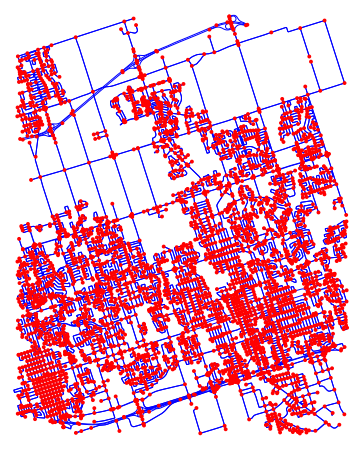

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive') 
# Plotting the map graph 
ox.plot_graph(G, bgcolor='white', edge_color='blue', node_color='red')

#### Define Starting and Ending Locations

In [4]:
start_point = (43.902926, -78.949285)
end_point = (43.944515, -78.895384)

We will find a method of using addresses here, rather than coordinates.

#### Get the Corresponding Nodes

OSMnx has a built in function that will find the closest node in our graph, G, to a given location.

In [5]:
# Get the nearest nodes to the locations 
start_node = ox.get_nearest_node(G, start_point) 
end_node = ox.get_nearest_node(G, end_point)

In [6]:
print('Start Node: ', start_node)
print('End Node: ', end_node)

Start Node:  1077969015
End Node:  2765873189


In [11]:
# See the info for the starting node
G[start_node]

AdjacencyView({1077968892: {0: {'osmid': 92992081, 'lanes': '2', 'name': 'Vanier Street', 'highway': 'residential', 'oneway': False, 'length': 85.763}}, 1077968877: {0: {'osmid': 92992056, 'lanes': '2', 'name': 'Robideau Place', 'highway': 'residential', 'oneway': False, 'length': 77.681, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001E892074730>}}, 1050936067: {0: {'osmid': 92992066, 'lanes': '2', 'name': 'Vanier Street', 'highway': 'residential', 'oneway': False, 'length': 102.86, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001E8920745B0>}}})

In [8]:
# See the nodes that are attached to the starting node 
for x in G[start_node]:
    print(x)

1077968892
1077968877
1050936067


In [9]:
# See the info for the end node
G[end_node]

AdjacencyView({1076440552: {0: {'osmid': 92829418, 'lanes': '2', 'name': 'Founders Drive', 'highway': 'residential', 'oneway': False, 'length': 270.52400000000006, 'geometry': <shapely.geometry.linestring.LineString object at 0x000002314A6B7850>}}})

In [10]:
# See the nodes that are attached to the end node
for x in G[end_node]:
    print(x)

1076440552


#### Get the Optimal Path

In [11]:
route = nx.shortest_path(G, start_node, end_node, weight='length')
route

[1077969015,
 1050936067,
 1077968886,
 392178970,
 394454438,
 392167544,
 392168518,
 392180372,
 392168202,
 392172596,
 1050800983,
 1077621563,
 1077620906,
 1077620914,
 1077621029,
 1077621338,
 3877460870,
 1077631215,
 1077631196,
 1077631247,
 1077631228,
 1077631233,
 392169423,
 4377213094,
 4377206047,
 4377213099,
 4377213104,
 4377213107,
 392168625,
 3564553395,
 3564553396,
 4592786056,
 4592786055,
 4592786053,
 3250079794,
 3250079798,
 3077238808,
 8177214338,
 8177214336,
 8177214332,
 1076440595,
 1076440513,
 1076440552,
 2765873189]

In [13]:
# Get the number of steps 
num_steps = len(route)
num_steps

44

#### Plot the Route

For now we will plot the route as a subgraph of the original graph, but we will include functionality here to show a labeled street map.

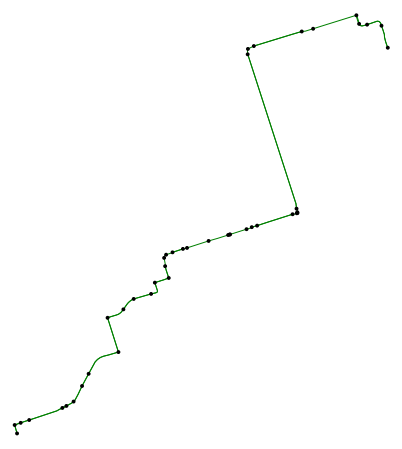

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [14]:
route_graph = G.subgraph(route)
ox.plot_graph(route_graph, bgcolor='white', edge_color='green', node_color='black')

#### Exploring the Route

The graph nodes and edges contain a lot of information that we can use.

In [28]:
num_steps = len(route)
i = 0
j = 1
# We want to get the information for every step in the route
# We handle if any information is unlisted or unknown
while j < num_steps:
    try:
        name = G[route[i]][route[j]][0]['name']
    except KeyError:
        name = 'Unnamed'
    try:
        street_type = G[route[i]][route[j]][0]['highway']
    except KeyError:
        street_type = 'Unknown'
    try:
        seg_len = G[route[i]][route[j]][0]['length']
    except KeyError:
        seg_len = 'Unknown'
    print('Segment Number: ', j)
    print('Street Name: ', name)
    print('Type: ', street_type)
    print('Segment Length: ', seg_len)
    print('\n')
    i +=1
    j +=1

Segment Number:  1
Street Name:  Vanier Street
Type:  residential
Segment Length:  102.86


Segment Number:  2
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  75.001


Segment Number:  3
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  105.546


Segment Number:  4
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  415.333


Segment Number:  5
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  54.488


Segment Number:  6
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  98.928


Segment Number:  7
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  209.158


Segment Number:  8
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  162.799


Segment Number:  9
Street Name:  Dryden Boulevard
Type:  tertiary
Segment Length:  461.44899999999996


Segment Number:  10
Street Name:  Anderson Street
Type:  tertiary
Segment Length:  422.297


Segment Number:  11
Street Name:  Darren Avenue
Type:  resident

We see that longer streets, like Dryden Boulevard, for example, consists of many nodes.  We will find a way to combine these lengths so that just the total is shown while there is no change in street. 

### Customization

### Avoiding a Certain Intersection

Say leaving Vanier Street I see that there is a blockage at the intersection with Dryden Boulevard, and so I want to not make this first turn onto Dryden.  To handle this, we can simply remove this node and regenerate the path.

In [40]:
# First, make a copy of the graph
G2 = nx.Graph.copy(G)

In [41]:
# Remove the third node from the route
G2.remove_node(route[2])

In [56]:
# Generate the new route
new_route = nx.shortest_path(G2, start_node, end_node, weight='length')

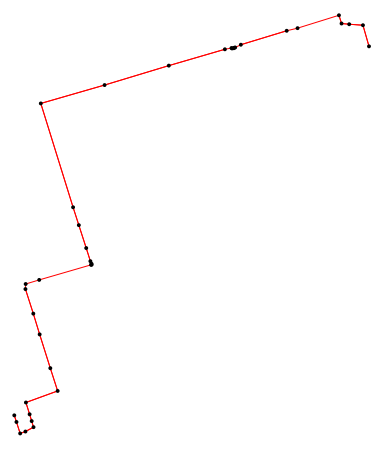

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [57]:
# Plot the graph of the new route
new_route_graph = G2.subgraph(new_route)
ox.plot_graph(new_route_graph, bgcolor='white', edge_color='red', node_color='black')

#### Avoiding an Entire Street

Say instead of just avoiding that intersection we want to avoid Dryden Boulevard altogether.  This can also easily be done.

In [46]:
# First, make a copy of the graph
G3 = nx.Graph.copy(G)

In [58]:
num_steps = len(route)
dryden_nodes = []
i = 0
j = 1
# For every step in the original route, if it's name is Dryden Boulevard,
# we add these nodes to a list that we will remove
# We handle if any information is unlisted or unknown
while j < num_steps:
    try:
        step_name = G[route[i]][route[j]][0]['name']
    except KeyError:
        step_name = 'Unknown'
    if step_name == 'Dryden Boulevard':
        dryden_nodes.append(route[i])
        dryden_nodes.append(route[j])
    i +=1
    j +=1

In [59]:
# Since nodes are being added as starting and ending for steps,
# we remove duplicates
dryden_nodes = list(set(dryden_nodes))

In [60]:
# We now remove all of these nodes from our new graph
G3.remove_nodes_from(dryden_nodes)

In [62]:
# Generate the new optimal path, avoiding Dryden Boulevard
newest_route = nx.shortest_path(G3, start_node, end_node, weight = 'length')

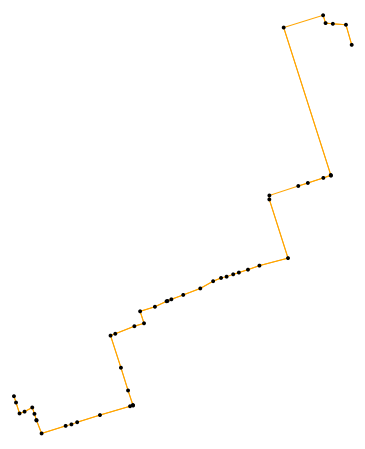

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [63]:
# Plot the new route
newest_route_graph = G3.subgraph(newest_route)
ox.plot_graph(newest_route_graph, bgcolor='white', edge_color='orange', node_color='black')